### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pca import pca
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file (preprocessed data)
data = pd.read_csv("customer_final_dat.csv", header=0)

In [3]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Days_Customer,Age,Total_Spent,Total_NumPurchase,Total_Offers
0,5524,Bachelor,Single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,663,66,1617,25,1
1,2174,Bachelor,Single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,113,69,27,6,0
2,4141,Bachelor,Partner,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,312,58,776,21,0
3,6182,Bachelor,Partner,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,139,39,53,8,0
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,161,42,422,19,0


### Scaling Features

In [4]:
# Label enconding categorical variables
categorical_col=data.select_dtypes(include='object').columns.tolist() # Education and Marital_Status

LE=LabelEncoder()
for i in categorical_col:
    data[i]=data[[i]].apply(LE.fit_transform)

In [5]:
# scaling features 
data = data.drop(["ID"], axis=1)
df = data.copy() # making a copy dataset to work on 
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns= df.columns )

In [6]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Days_Customer,Age,Total_Spent,Total_NumPurchase,Total_Offers
0,-0.855791,1.269031,0.236068,-0.825388,-0.930227,0.307272,0.983671,1.554623,1.680253,2.461700,...,-0.279414,-0.262299,-0.11659,-0.09498,2.386966,1.530038,1.017296,1.680649,1.319785,0.620785
1,-0.855791,1.269031,-0.234982,1.032151,0.906417,-0.383584,-0.870717,-0.636422,-0.713250,-0.650275,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-1.191484,1.273722,-0.961838,-1.155824,-0.501847
2,-0.855791,0.297829,0.774257,-0.825388,-0.930227,-0.798098,0.362570,0.572430,-0.176928,1.345050,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-0.206788,0.333495,0.282956,0.798604,-0.501847
3,-0.855791,0.297829,-1.021717,1.032151,-0.930227,-0.798098,-0.870717,-0.560868,-0.651196,-0.503829,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-1.062830,-1.290534,-0.918627,-0.895234,-0.501847
4,1.628835,-0.673372,0.242259,1.032151,-0.930227,1.550812,-0.389289,0.421324,-0.216820,0.155177,...,-0.279414,-0.262299,-0.11659,-0.09498,-0.418942,-0.953970,-1.034108,-0.305371,0.538014,-0.501847


### Dimensionality Reduction

Since there are 30 features in the dataset, there may be redudant features, and larger number of features makes the model less interpretable. Therefore, I'll perform dimensionality reduction to remove redudancy while preserving key information. Here, I selected PCA to capture the most defining features and patterns in the dataset.

In [7]:
pca = PCA(n_components=3)
pca_array = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_array, columns=(["col1","col2", "col3"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2237.0,3.811584e-17,2.885563,-4.741131,-2.668673,-0.656426,2.308410,9.125313
col2,2237.0,-4.049808e-17,1.632690,-3.594220,-1.112152,-0.057796,0.619114,8.933299
col3,2237.0,-2.541056e-17,1.522856,-3.989391,-1.040121,-0.209478,0.966873,6.086690


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [29] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


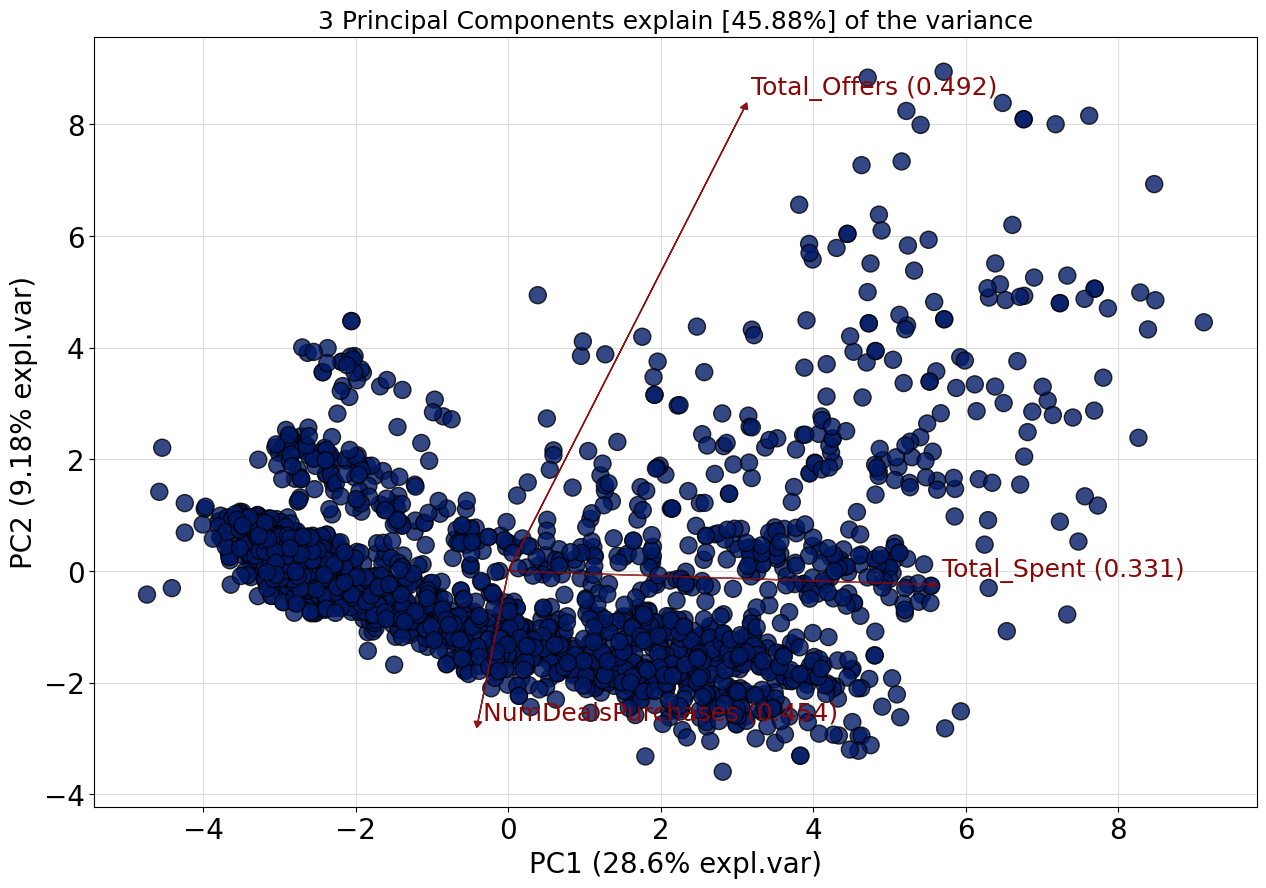

In [10]:
model = pca(n_components=3)
results = model.fit_transform(df)
fig, ax = model.biplot(n_feat=3, figsize = (15,10), legend=False)

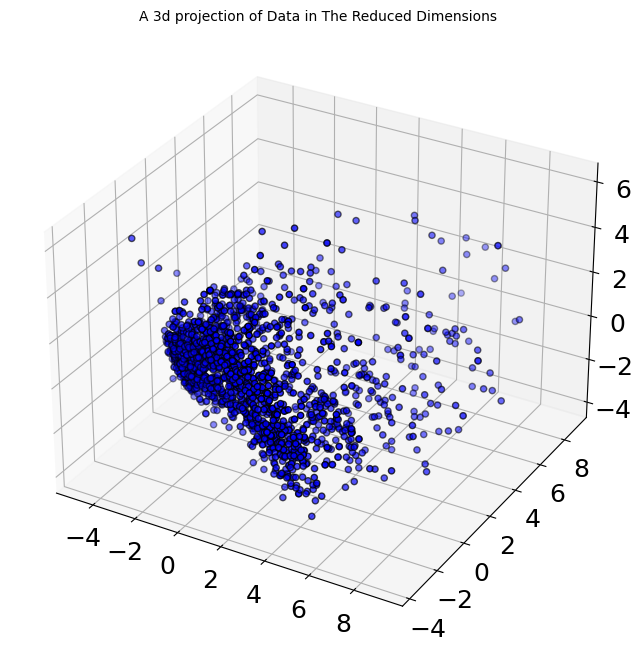

In [11]:
# 3d projection of data in the reduced dimensions
a=pca_df['col1']
b=pca_df['col2']
c=pca_df['col3']

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(a,b,c, c='blue', marker='o', edgecolor='black')
ax.set_title('A 3d projection of Data in The Reduced Dimensions', size=10)
plt.show()

### K-Means Clustering

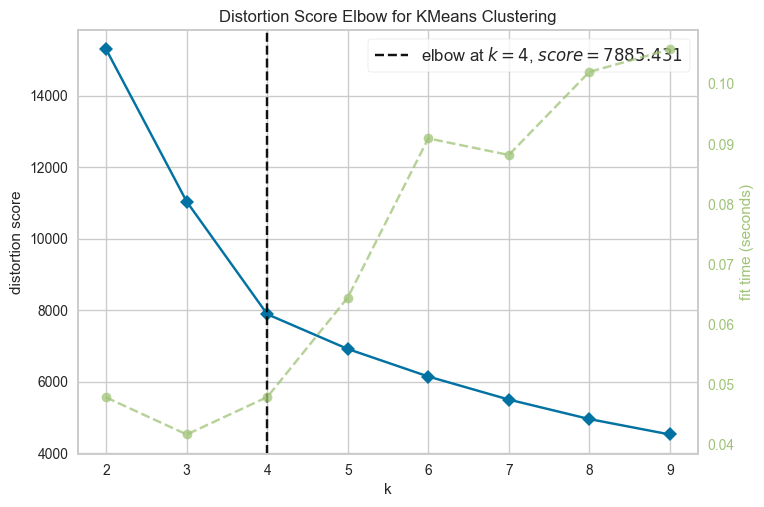

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(pca_df)       
visualizer.show() 